# Summarize Pan-UKB block information

In [2]:
using DelimitedFiles
using Plots
using LaTeXStrings
gr(fmt=:png)

function summarize(include_imputed::Bool)
    dir = include_imputed ? "/oak/stanford/groups/zihuai/pan_ukb_group_knockoffs/maxent_hc_all" : 
        "/oak/stanford/groups/zihuai/pan_ukb_group_knockoffs/maxent_hc"
    p, nreps, max_group_size, max_rep_group_size = Float64[], Float64[], Float64[], Float64[]
    for chr in 1:22
        files = readdir(joinpath(dir, "chr$chr"))
        for f in files
            startswith(f, "summary") || continue
            summary_file = readdlm(joinpath(dir, "chr$chr", f), ',')
            push!(p, summary_file[5, 2])
            push!(nreps, summary_file[6, 2])
            push!(max_group_size, summary_file[7, 2])
            push!(max_rep_group_size, summary_file[8, 2])
        end
    end
    return p, nreps, max_group_size, max_rep_group_size
end

summarize (generic function with 1 method)

## Including all SNPs + typed SNPs only

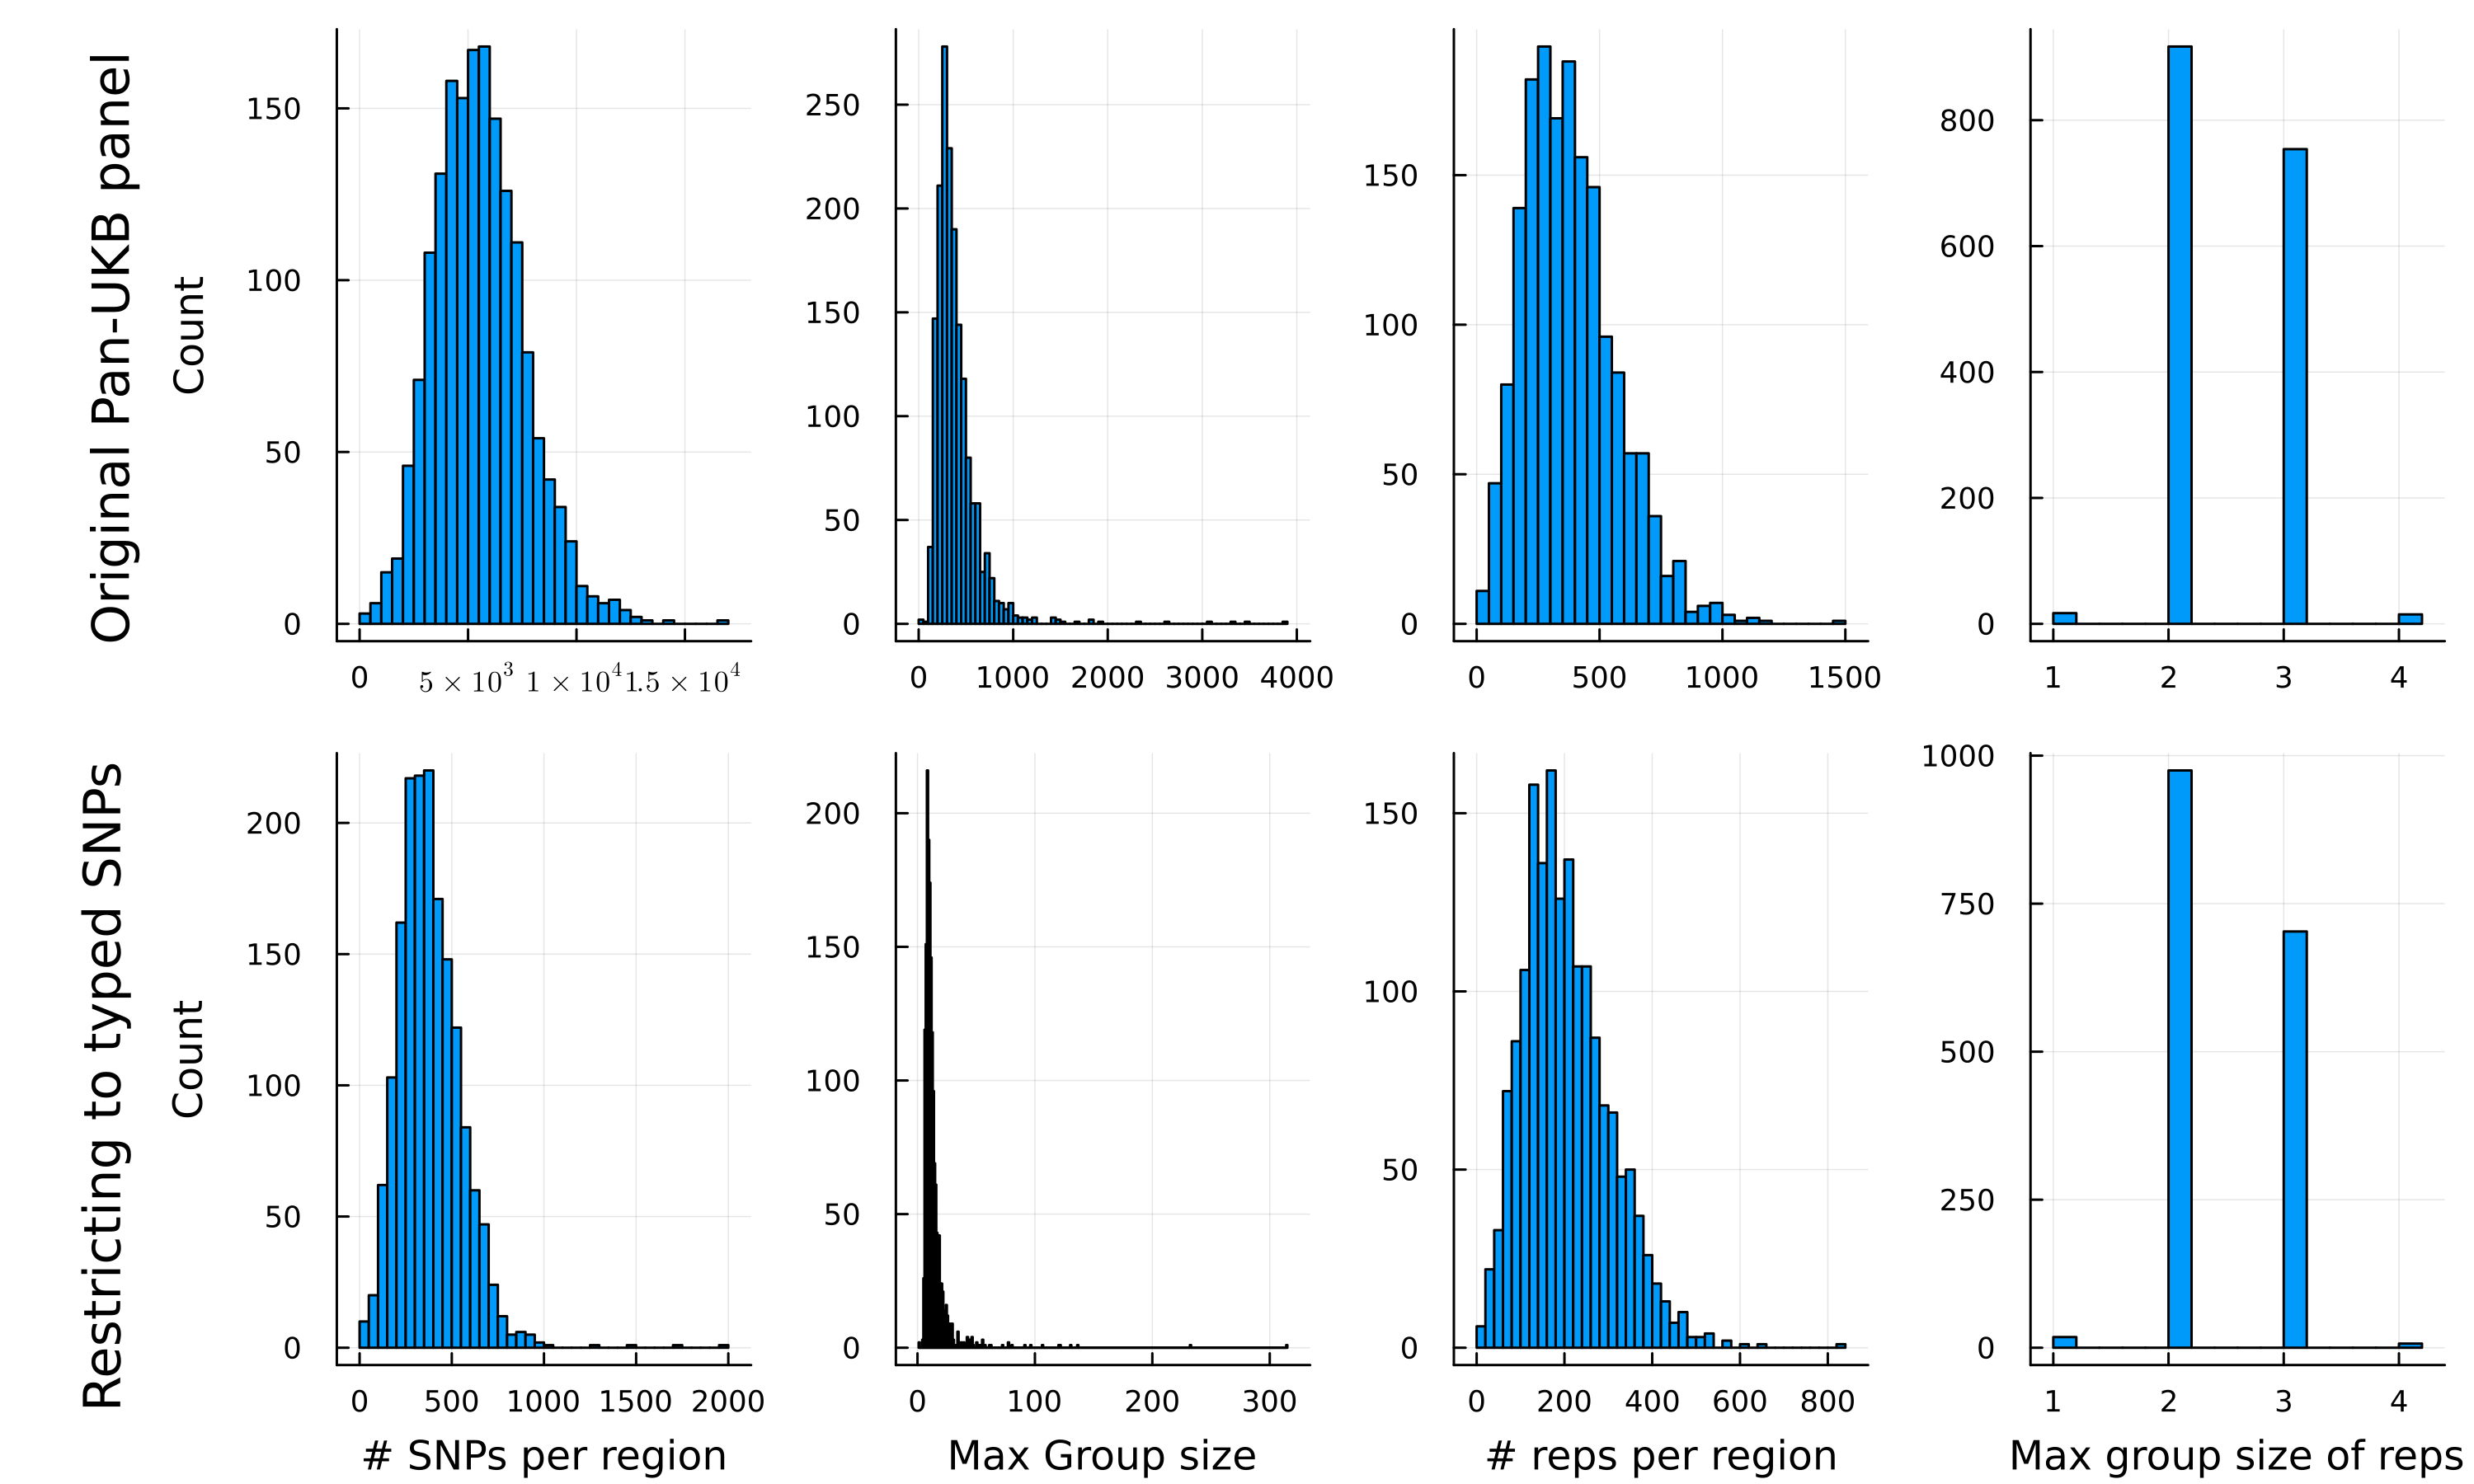

In [7]:
# representative (excluding imputed SNPs)
include_imputed = false
p, nreps, max_group_size, max_rep_group_size = summarize(include_imputed)
p_plt1 = histogram(p, ylabel="Count", xlabel="# SNPs per region", legend=false, left_margin=20Plots.mm)
rep_plt1 = histogram(nreps, xlabel="# reps per region", legend=false)
groupsize_plt1 = histogram(max_group_size, xlabel="Max Group size", legend=false)
rep_groupsize_plt1 = histogram(max_rep_group_size, xlabel="Max group size of reps", legend=false)

# original (including imputed SNPs)
include_imputed = true
p, nreps, max_group_size, max_rep_group_size = summarize(include_imputed)
p_plt2 = histogram(p, ylabel="Count", legend=false,
    xticks=([0, 5000, 10000, 15000],["0", L"5\times 10^3", L"1\times 10^4", L"1.5\times 10^4"]),
    left_margin=20Plots.mm)
rep_plt2 = histogram(nreps, legend=false)
groupsize_plt2 = histogram(max_group_size, legend=false)
rep_groupsize_plt2 = histogram(max_rep_group_size, legend=false)

# add annotation
annotate!(p_plt1, -1400, 100, Plots.text("Restricting to typed SNPs", :black, rotation = 90))
annotate!(p_plt2, -11500, 80, Plots.text("Original Pan-UKB panel", :black, rotation = 90))

# final plot
plt = plot(
    p_plt2, groupsize_plt2, rep_plt2, rep_groupsize_plt2, 
    p_plt1, groupsize_plt1, rep_plt1, rep_groupsize_plt1, 
    layout=(2, 4), size=(1000,600), 
    bottom_margin=2Plots.mm, dpi=300)

In [8]:
savefig(plt, "/home/users/bbchu/knockoffs/plots/panukb_summary.pdf")

"/home/users/bbchu/knockoffs/plots/panukb_summary.pdf"

## Plot for typed SNPs only

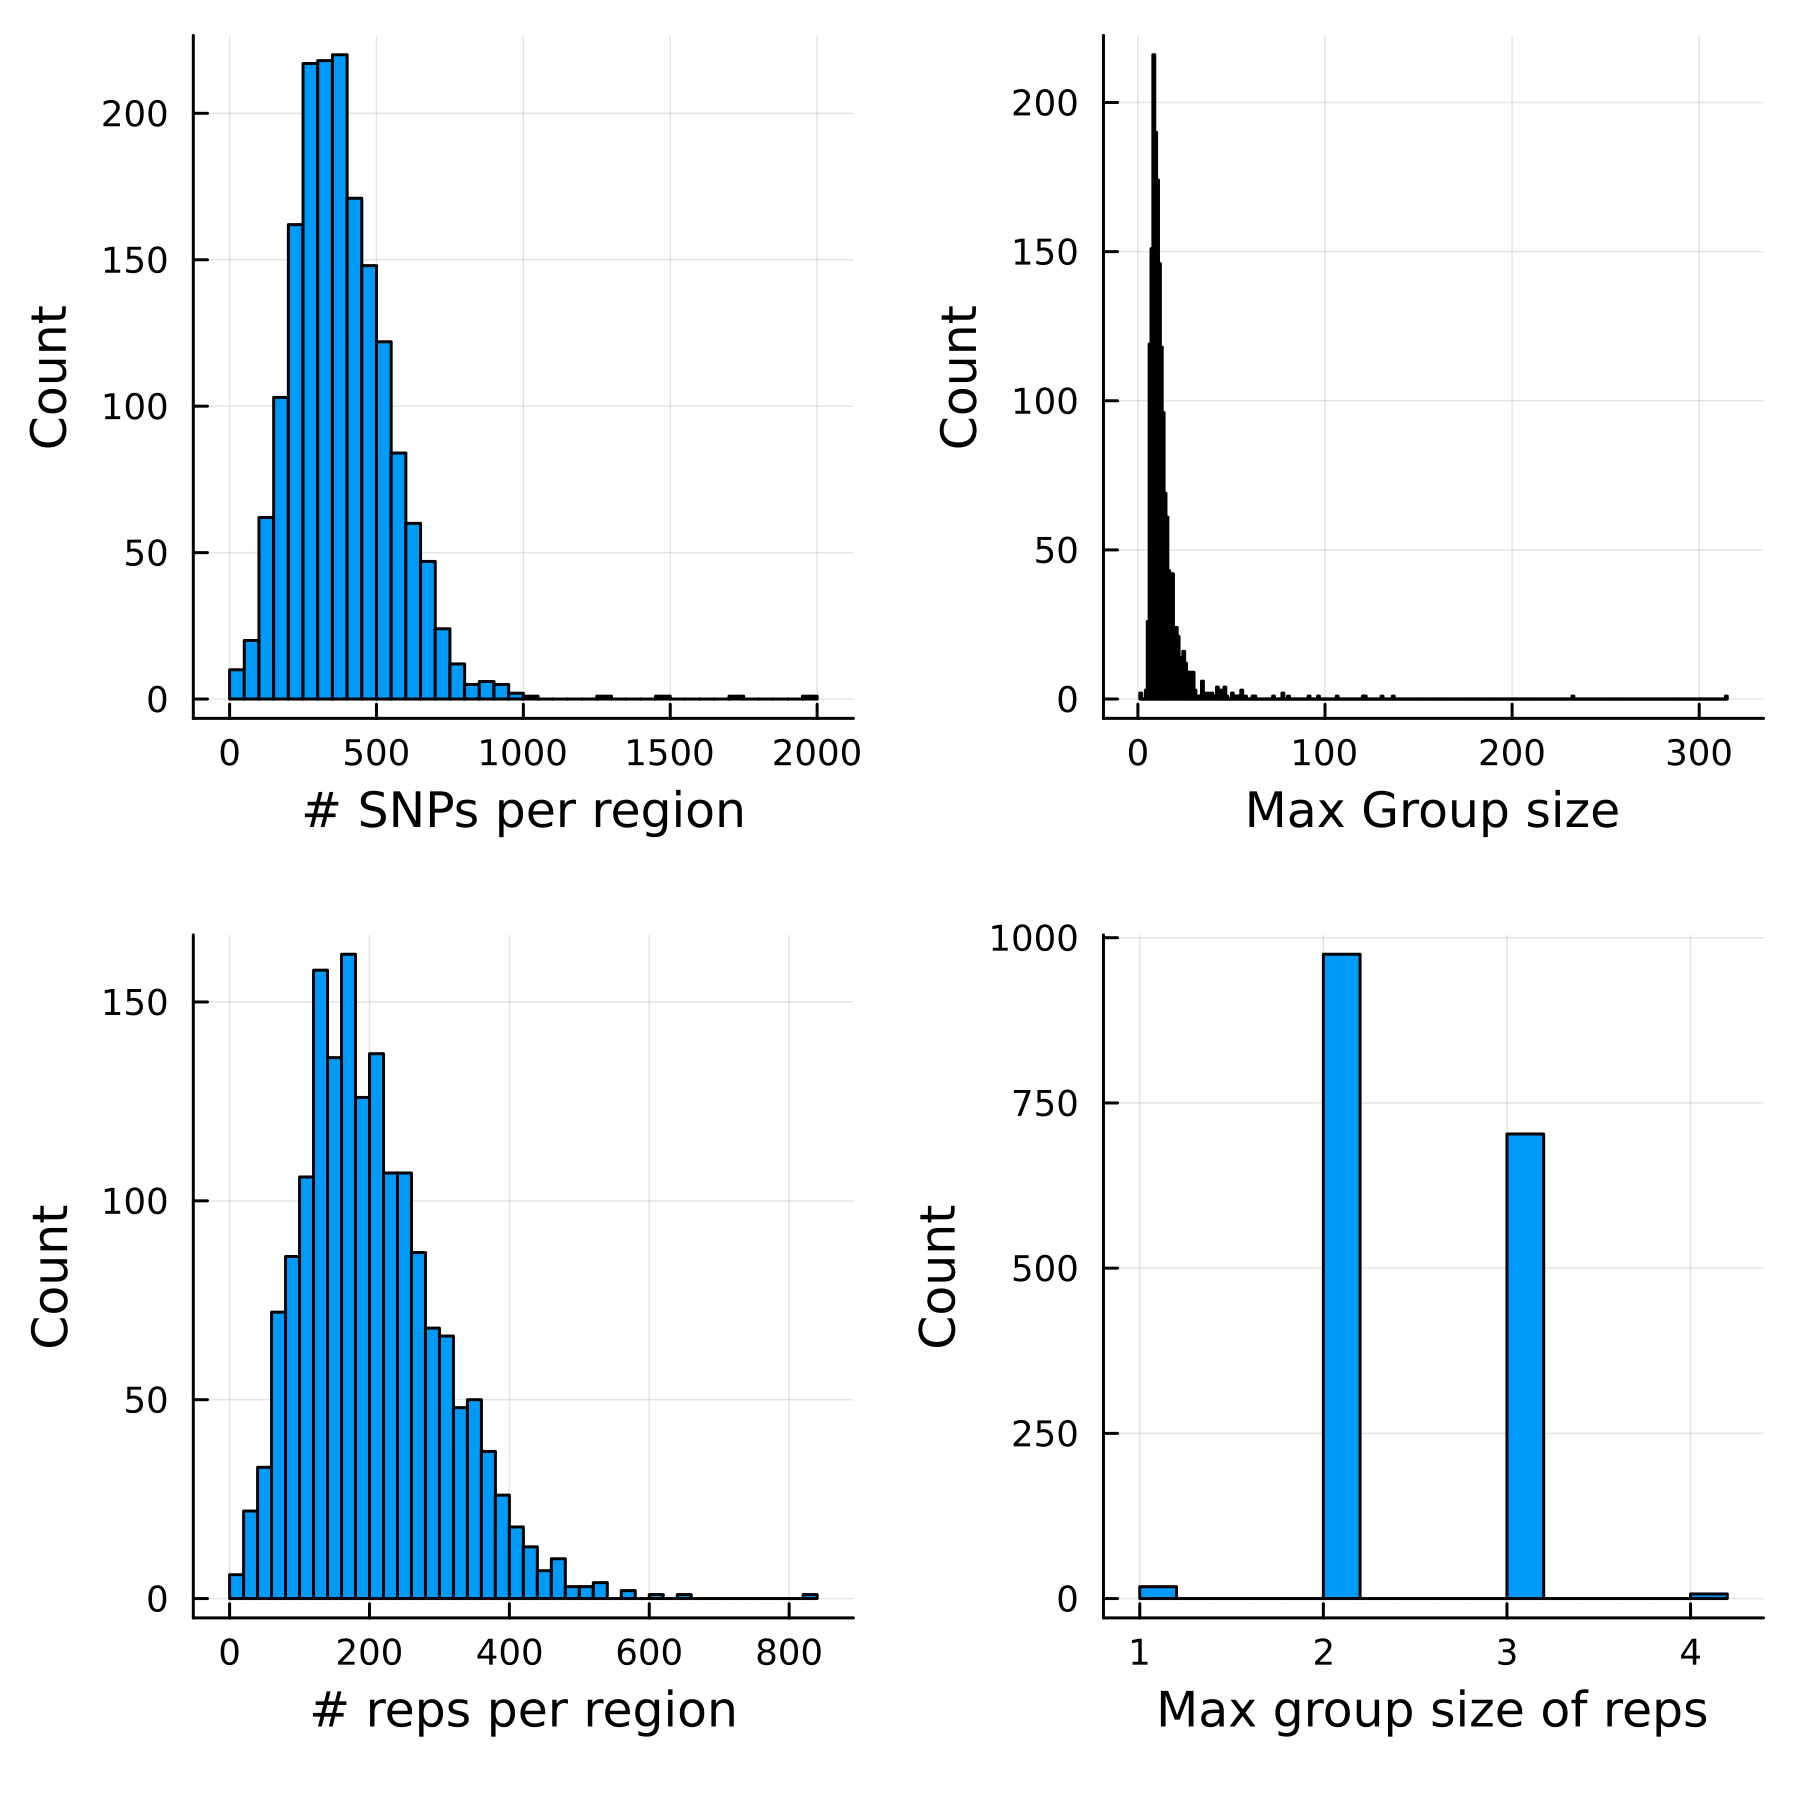

In [16]:
# representative (excluding imputed SNPs)
include_imputed = false
p, nreps, max_group_size, max_rep_group_size = summarize(include_imputed)
p_plt1 = histogram(p, ylabel="Count", xlabel="# SNPs per region", legend=false)
rep_plt1 = histogram(nreps, ylabel="Count", xlabel="# reps per region", legend=false)
groupsize_plt1 = histogram(max_group_size, ylabel="Count", xlabel="Max Group size", legend=false)
rep_groupsize_plt1 = histogram(max_rep_group_size, ylabel="Count", 
    xlabel="Max group size of reps", legend=false)

# final plot
plt = plot(
    p_plt1, groupsize_plt1, rep_plt1, rep_groupsize_plt1, 
    layout=(2, 2), size=(600,600), 
    bottom_margin=2Plots.mm, dpi=300)

In [17]:
savefig(plt, "/home/users/bbchu/knockoffs/plots/panukb_summary_typed.pdf")

"/home/users/bbchu/knockoffs/plots/panukb_summary_typed.pdf"

## Comparison of typed vs imputed SNPs

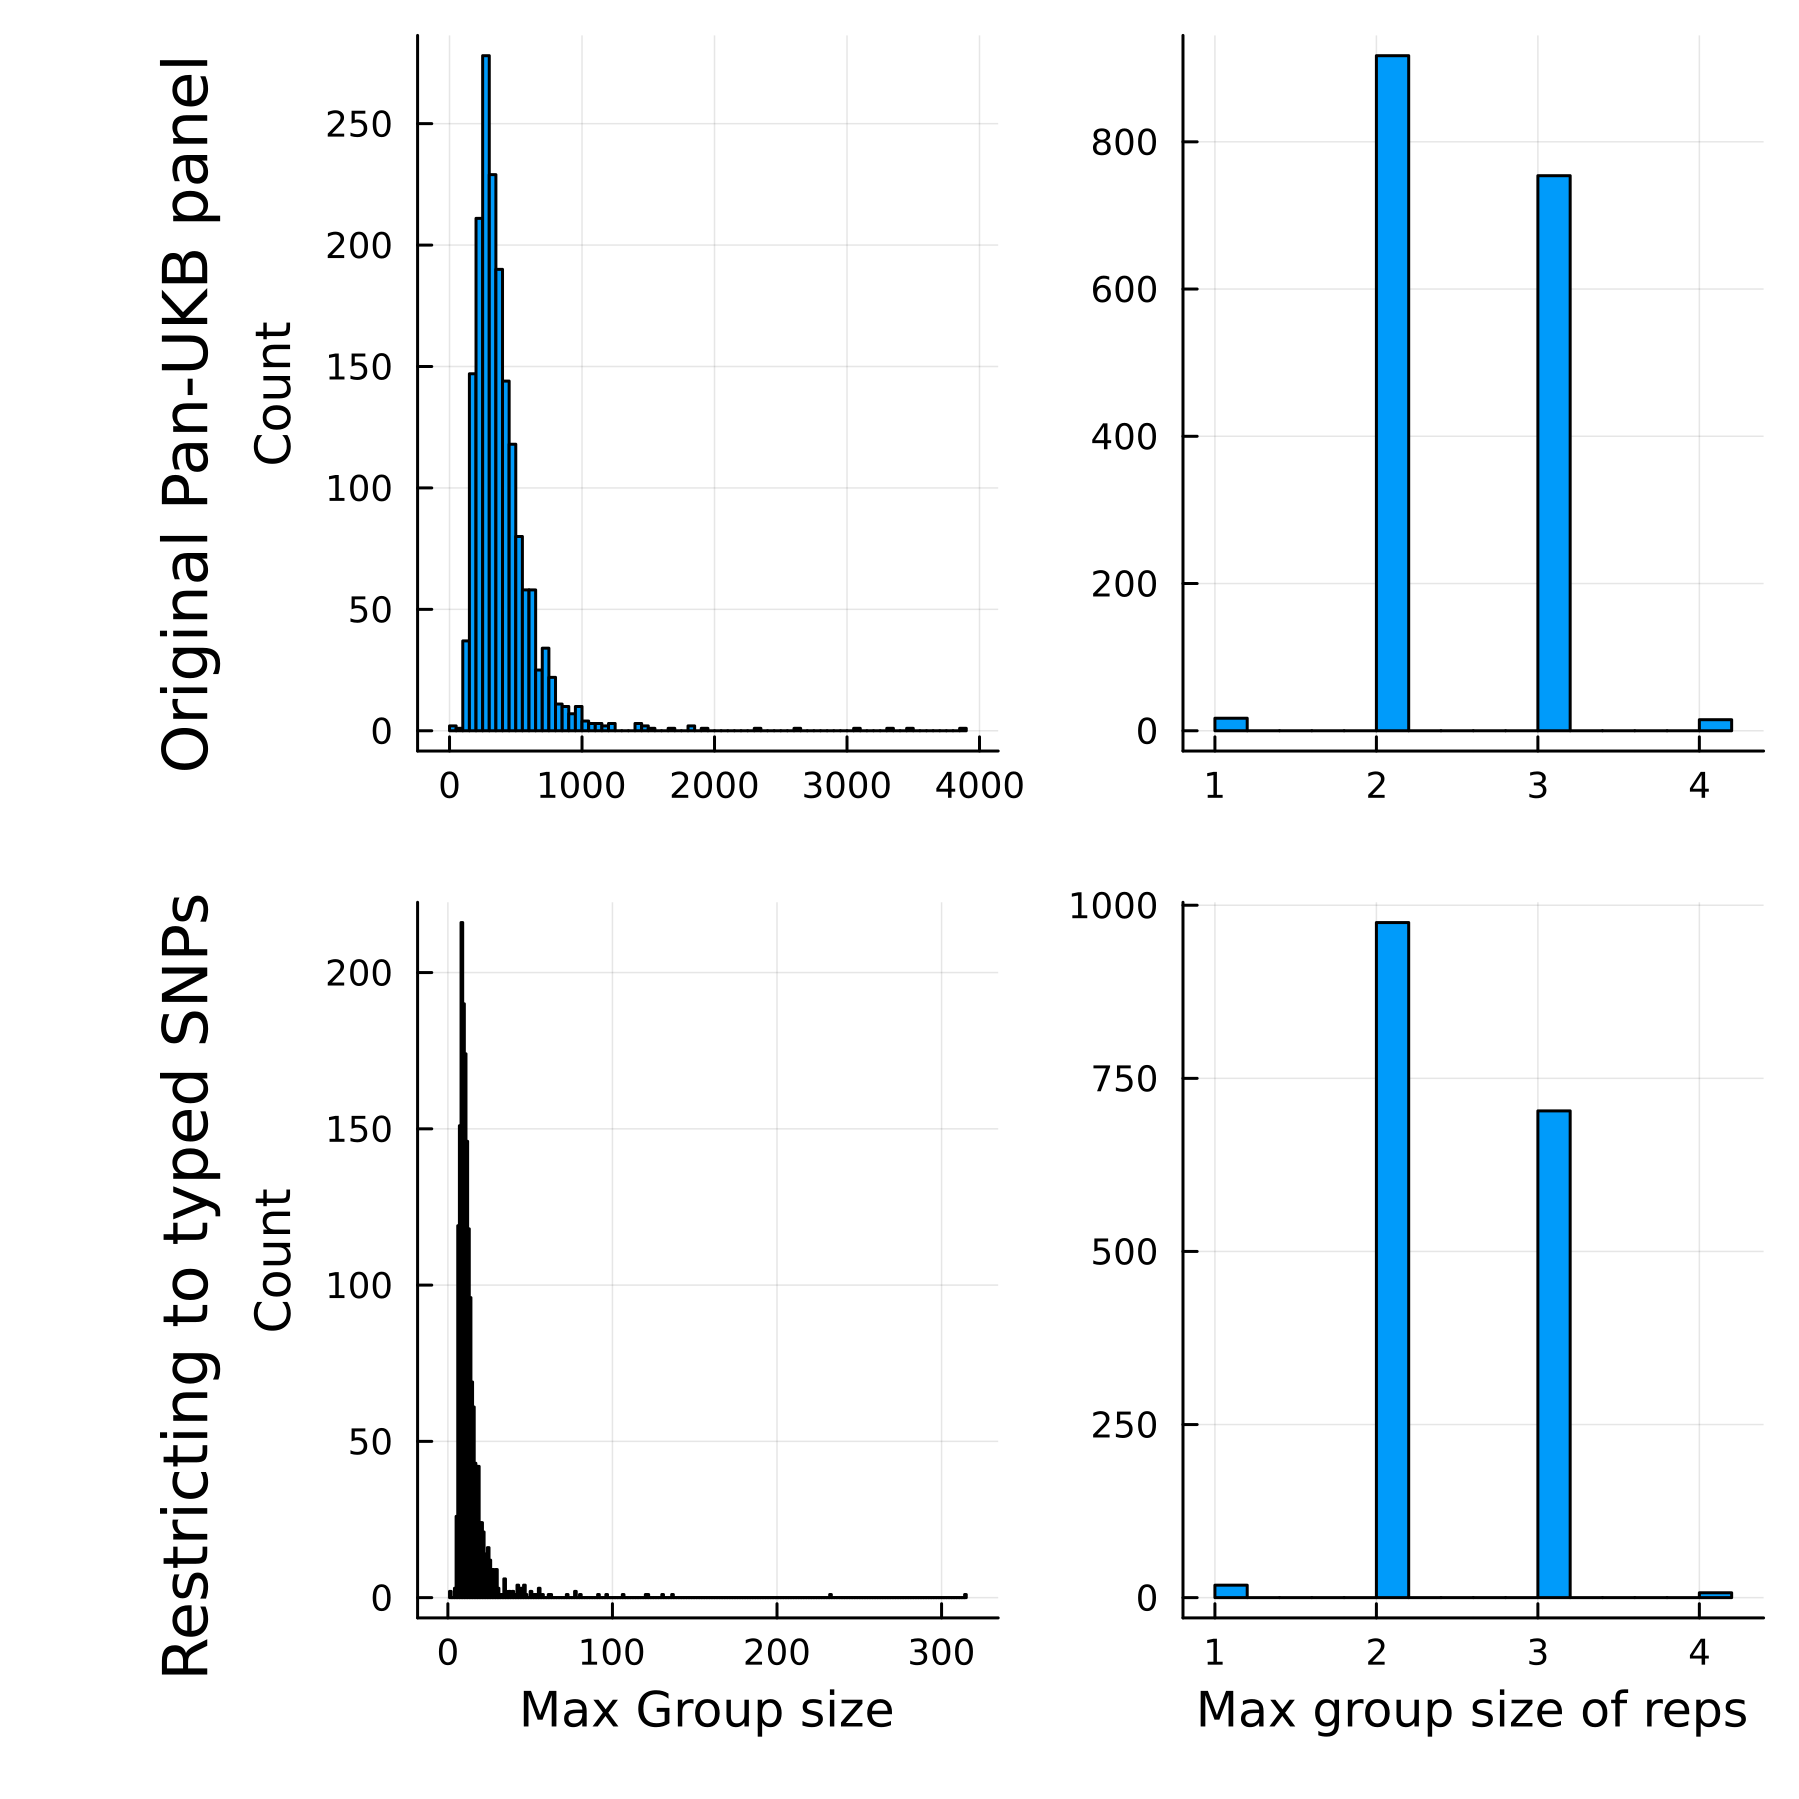

In [25]:
# representative (excluding imputed SNPs)
include_imputed = false
p, nreps, max_group_size, max_rep_group_size = summarize(include_imputed)
groupsize_plt1 = histogram(max_group_size, ylabel="Count", 
    xlabel="Max Group size", legend=false, left_margin=20Plots.mm)
rep_groupsize_plt1 = histogram(max_rep_group_size, xlabel="Max group size of reps", legend=false)

# original (including imputed SNPs)
include_imputed = true
p, nreps, max_group_size, max_rep_group_size = summarize(include_imputed)
groupsize_plt2 = histogram(max_group_size, legend=false, ylabel="Count", left_margin=20Plots.mm)
rep_groupsize_plt2 = histogram(max_rep_group_size, legend=false)

# add annotation
annotate!(groupsize_plt2, -2000, 130, Plots.text("Original Pan-UKB panel", :black, rotation = 90))
annotate!(groupsize_plt1, -160, 100, Plots.text("Restricting to typed SNPs", :black, rotation = 90))

# final plot
plt = plot(
    groupsize_plt2, rep_groupsize_plt2, 
    groupsize_plt1, rep_groupsize_plt1, 
    layout=(2, 2), size=(600,600), 
    bottom_margin=2Plots.mm, dpi=300)

In [26]:
savefig(plt, "/home/users/bbchu/knockoffs/plots/panukb_summary_typed2.pdf")

"/home/users/bbchu/knockoffs/plots/panukb_summary_typed2.pdf"